In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [ ]:
lead_df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
lead_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**STEP 2** -  Inspecting the DataFrame

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
# Missing Data percentage
round(lead_df.isnull().sum()/lead_df.shape[0], 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.00
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,0.01
Total Time Spent on Website,0.00
Page Views Per Visit,0.01


Looking at the dataset we observed that following things needs to be done:


. Encoding categorical variables

. Missing value handling

. Convert the Select into the NaN

. Dropping columns having more than 70% null values

**Step 3:** **Data Preparation**

Converting Yes/no to 1/0's:

In [ ]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']:
     lead_df[feature] =lead_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


## **Converting SELECTs into NaNs:**

In [ ]:
# listing the categorical variables yet to be encoded
lead_df.select_dtypes(include = 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [ ]:
# checking the labels of the remaining categorical columns
for col in lead_df.iloc[:,1:].select_dtypes(include = 'object').columns:
  print(col)
  print('______________________________________________________________________________________________')
  print(lead_df[col].value_counts(normalize= True))
  print('______________________________________________________________________________________________')

Lead Origin
______________________________________________________________________________________________
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
______________________________________________________________________________________________
Lead Source
______________________________________________________________________________________________
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
Pay per Click Ads    0.000109
blog

In [ ]:
# converting all the selects to NAN as the user didnt select any option from the list and "select" is as good as "NAN"
lead_df  =  lead_df.replace('Select', np.nan)

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Handling Missing Value**

In [ ]:
# dropping columns having more than 70% null values
lead_df =  lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)> 0.70)].columns, axis=1)

In [ ]:
#  As the lead quality depends upons the intution of the employee, it will be safer to update the NaN to "Not Sure"
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan,'Not Sure')

Comment: There are too many variations in the columns ('Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score') and it is not safer to impute any values in the columns and hence we will drop these columns with very high percentage of missing data



In [ ]:
columns_to_drop = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
existing_columns = [col for col in columns_to_drop if col in lead_df.columns]

if existing_columns:
    lead_df = lead_df.drop(existing_columns, axis=1)

In [ ]:
# We can impute the Mumbai into all the Nulls as most of the values belong to Mumbai
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')
# since there is no significant difference among top 3 specialisation, hence it will be safer to impute NaN with others
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others_specialization')
# for tags column, more than 30% data is for 'will revert after reading email" and hence we can impute NULLS with will after reading email
lead_df['Tags'] =  lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')
# More than 99% data is of 'Better career Prospect' and hence its safer to impute nulls with this value
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
# More than 85% data is of 'unemployed' and hence  it is safer to impute NULLS with this value
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')
# More than 95% data is of "India" and hence it is safer to impute nulls with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [ ]:
# checking missing data percentage in the updated dataframe
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [ ]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others_specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others_specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others_specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


**Step 4: Exploratory Data Analysis**

In [ ]:
# lets start with the target variable  and see if we have any data imbalance or not
lead_df['Converted'].value_counts(normalize= True)

,proportion
Converted,
0,0.621446
1,0.378554


We have good represenation of both the classes of data and hence we are good  to go with the further analysis

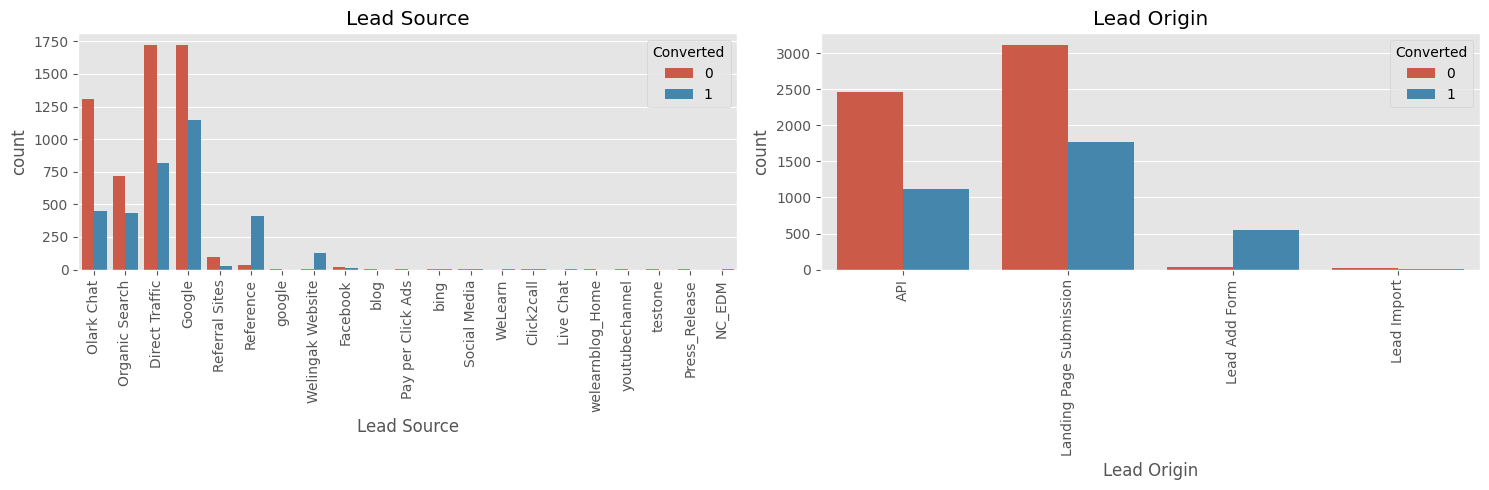

In [ ]:
# Just create 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Lead Source
sns.countplot(x='Lead Source', hue='Converted', data=lead_df, ax=ax1)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Lead Source')

# Plot Lead Origin
sns.countplot(x='Lead Origin', hue='Converted', data=lead_df, ax=ax2)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Lead Origin')

plt.tight_layout()
plt.show()

**OBSERVATION:**

API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable

The count of leads from the Lead Add Form is pretty low but the conversion rate is very high

Lead Import has very less count as well as conversion rate and hence can be ignored


**To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'**

In [ ]:
# Check if 'Lead Source' column exists before attempting to modify it
if 'Lead Source' in lead_df.columns:
    # We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis
    lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
      'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

    lead_df['Lead Source'] = lead_df['Lead Source'].replace("google", 'Google')
else:
    print("Error: 'Lead Source' column not found in DataFrame. Please ensure it is present before running this cell.")


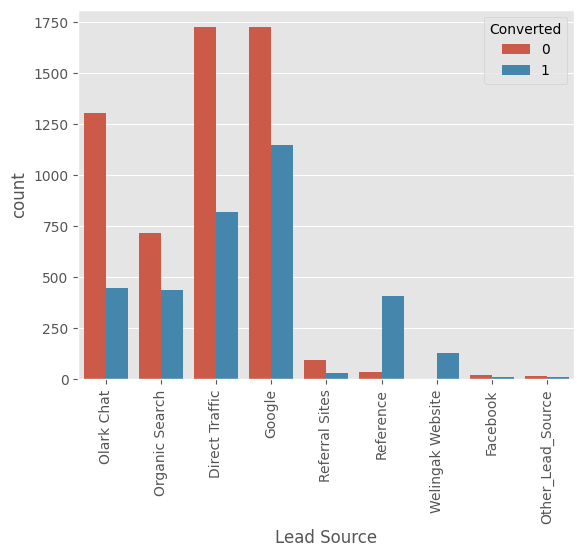

In [ ]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

# **OBSERVATION:**


The count of leads from the Google and Direct Traffic is maximum

The conversion rate of the leads from Reference and Welingak Website is maximum

**To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'**

Data types:
TotalVisits                    float64
Total Time Spent on Website      int64
dtype: object

Sample data:
   TotalVisits  Total Time Spent on Website
0          0.0                            0
1          5.0                          674
2          2.0                         1532
3          1.0                          305
4          2.0                         1428


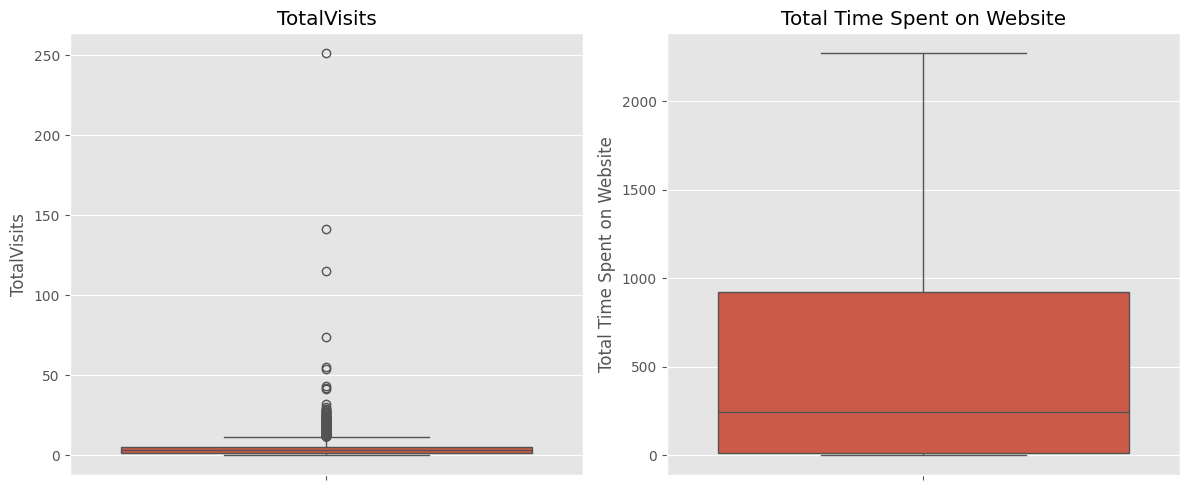

In [ ]:
# Check what's actually in your data
print("Data types:")
print(lead_df[['TotalVisits', 'Total Time Spent on Website']].dtypes)
print("\nSample data:")
print(lead_df[['TotalVisits', 'Total Time Spent on Website']].head())

# Simple boxplot test
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=lead_df, y='TotalVisits')
plt.title('TotalVisits')

plt.subplot(1, 2, 2)
sns.boxplot(data=lead_df, y='Total Time Spent on Website')
plt.title('Total Time Spent on Website')

plt.tight_layout()
plt.show()

In [ ]:
# There are lot of outliers in the Total visits columns and we can cap this variable to 95 percentile

q1 = lead_df['TotalVisits'].quantile(0.95)
lead_df['TotalVisits'][lead_df['TotalVisits'] >= q1] = q1

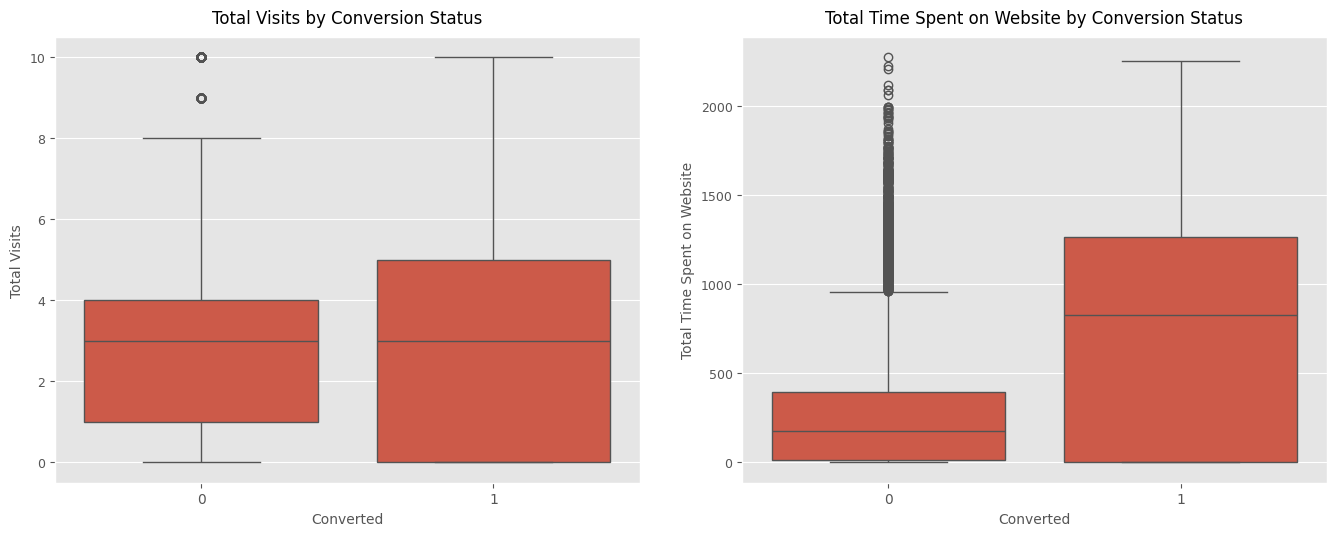

In [ ]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# List of features to plot
features = ["TotalVisits", "Total Time Spent on Website"]
titles = ["Total Visits", "Total Time Spent on Website"]

for i, (feature, title) in enumerate(zip(features, titles)):
    # Create boxplot
    sns.boxplot(y=feature, x='Converted', data=lead_df, ax=axes[i])

    # Customize each subplot
    axes[i].set_title(f'{title} by Conversion Status', fontsize=12, pad=10)
    axes[i].set_xlabel('Converted', fontsize=10)
    axes[i].set_ylabel(title, fontsize=10)

    # Rotate y-axis labels if they're too long
    axes[i].tick_params(axis='y', labelsize=9)

# Adjust layout to prevent overlapping
plt.tight_layout(pad=3.0)  # Add extra padding
plt.show()

# **OBSERVATION:**

The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information

Users spending more time on the website are more likely to get converted

Websites can be made more appealing so as to increase the time of the Users on websites

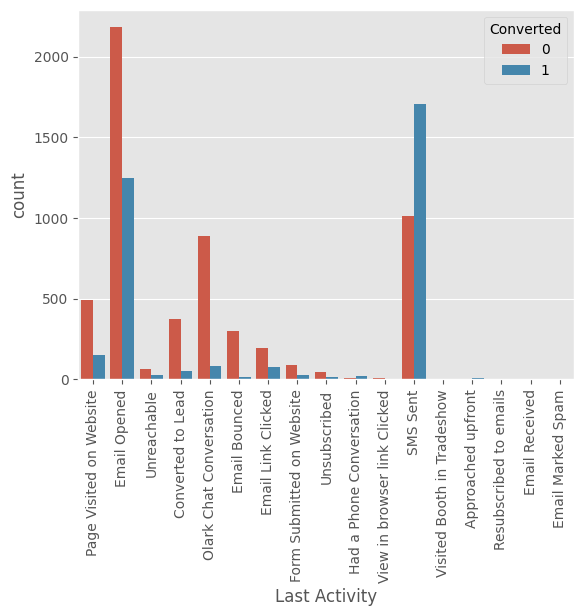

In [ ]:
  # plotting the last activity again

sns.countplot(x="Last Activity", hue = "Converted", data= lead_df)
plt.xticks(rotation="vertical")
plt.show()

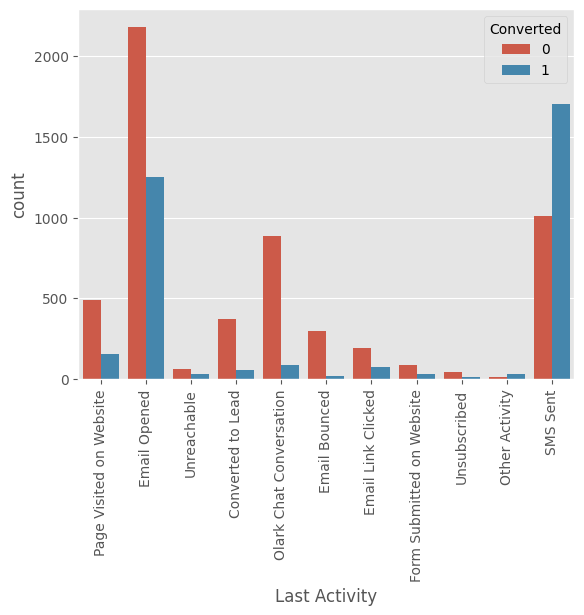

In [ ]:
# Converting all the low count categories to the 'Others' category
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again
sns.countplot(x="Last Activity", hue="Converted", data= lead_df)
plt.xticks( rotation='vertical')
plt.show()

**OBSERVATION:**

The count of lst activity as "Email Opened" is max

The conversion rate of SMS sent as last activity is maximum

We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

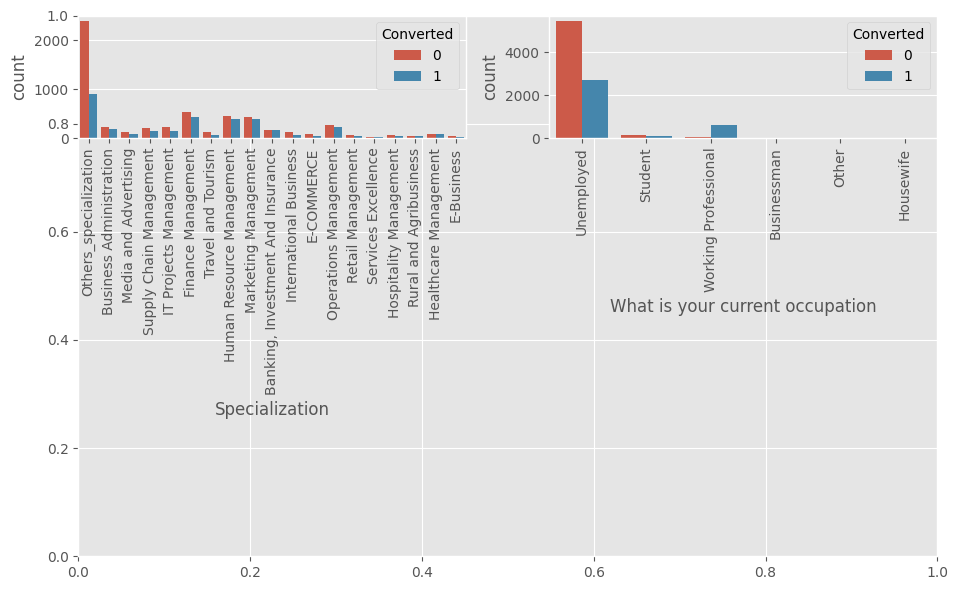

In [ ]:
fig=plt.subplots(figsize =(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
  plt.subplot(2, 2, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.countplot(x= feature, hue= 'Converted', data= lead_df)
  plt.xticks(rotation= "vertical")
  plt.tight_layout()

# **OBSERVATION:**

Looking at above plot, no particular inference can be made for Specialization

Looking at above plot, we can say that working professionals have high conversion rate

Number of Unemployed leads are more than any other category

**To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads**

Country, What matters most to you in choosing a course, City columns have most values corresponding to one value such as India for Country, Mumbai for city and hence there is no particular insights for these columns


In [ ]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace("Other", 'Other_Occupation')

In [ ]:
lead_df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


**OBSERVATION:**

We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

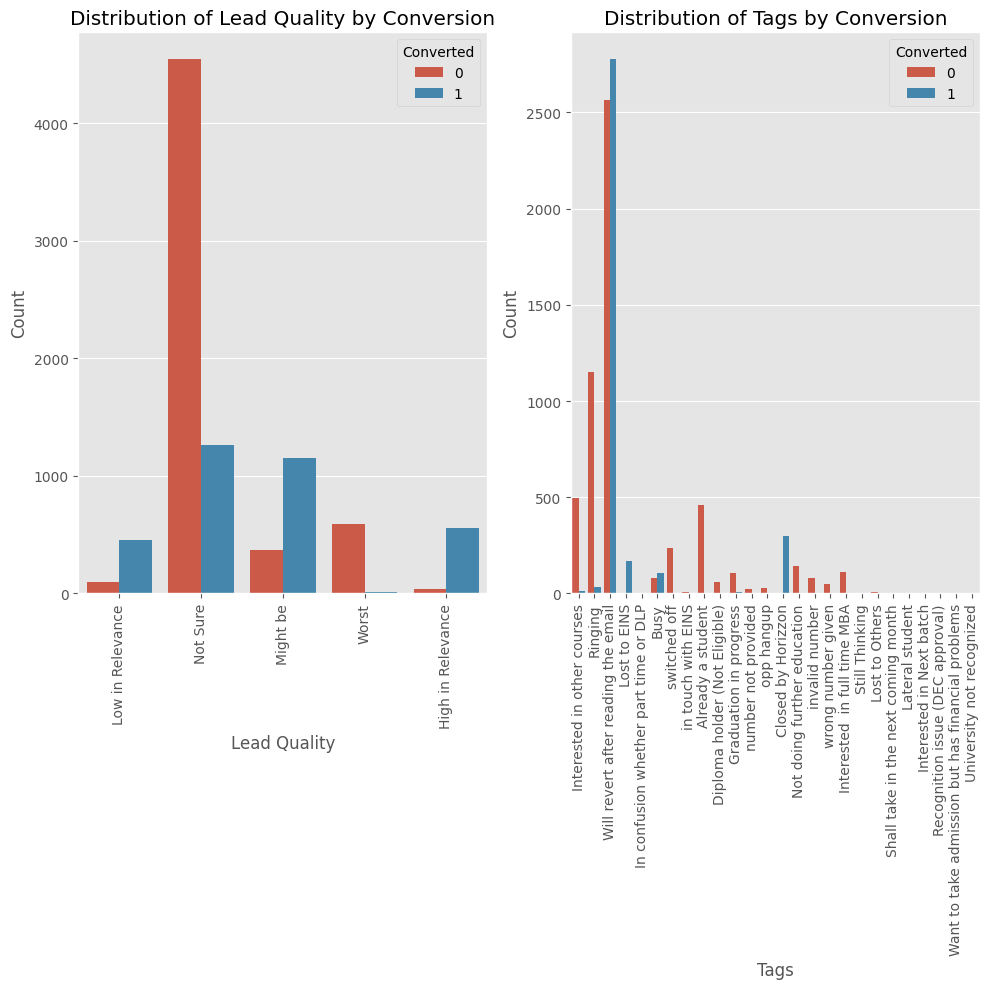

In [ ]:
# Create figure and axes properly
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# List of features to plot
features = ['Lead Quality', 'Tags']

for i, feature in enumerate(features):
    # Create countplot on the specific subplot
    sns.countplot(x=feature, hue='Converted', data=lead_df, ax=axes[i])

    # Rotate x-axis labels to prevent overlapping
    axes[i].tick_params(axis='x', rotation=90)

    # Set proper titles and labels
    axes[i].set_title(f'Distribution of {feature} by Conversion')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

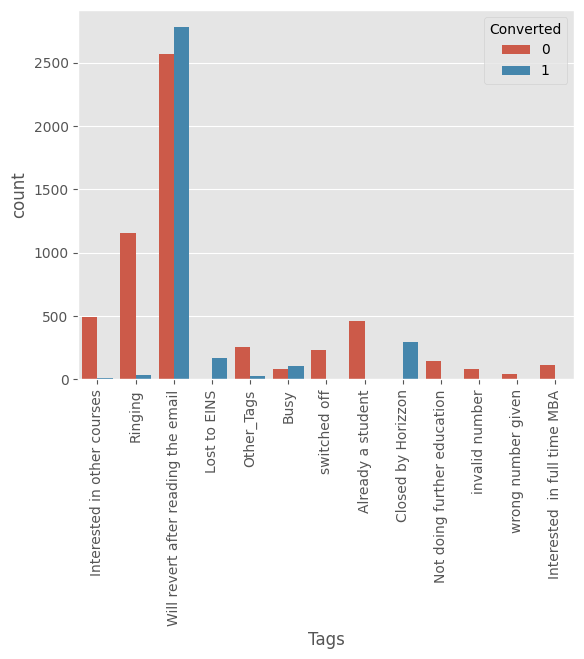

In [ ]:
#  converting all low count categories to other category
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')
# lets plot the tags again
sns.countplot(x="Tags", hue="Converted", data= lead_df)
plt.xticks(rotation="vertical")
plt.show()

# **OBSERVATION:**

'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

**SUMMARY**:

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'


To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'


Websites can be made more appealing so as to increase the time of the Users on websites


We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent


To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads


We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [ ]:
lead_df = lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'], axis=1)

lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others_specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others_specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others_specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# **Steps 5: Dummy Variable Creation**

In [ ]:
dummy = pd.get_dummies(lead_df[['Lead Origin',	'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags',
                                'Lead Quality', 'City', 'Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,F

In [ ]:
lead_df =  lead_df.drop(['Lead Origin',	'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags',
                                'Lead Quality', 'City', 'Last Notable Activity'], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [ ]:
lead_df = pd.concat([lead_df, dummy], axis= 1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

# **Step 6: Test-Train Split**

In [ ]:
# putting feature variable to x
X= lead_df.drop(['Prospect ID','Converted'], axis=1)

# puting response variable to y
y= lead_df['Converted']
print(y)
X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,

In [ ]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# **`Step 7: Feature Scaling `**

In [ ]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1012,1,-0.432779,-0.540048,-0.179666,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9226,0,-1.150329,-0.888650,-1.132538,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,F

In [ ]:
# checking the conversion rate
print('Converstion rate is', (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Converstion rate is 37.85541106458012


# **Step 8 : Looking at Correlations**

In [ ]:
# correlation between different numercial variables for both the converted and not- converted cases
conv_corr = X.corr()
# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind = 'quicksort')
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending= False).head(10)

,,0
Lead Origin_Lead Import,Lead Source_Facebook,0.983684
Last Activity_Unsubscribed,Last Notable Activity_Unsubscribed,0.872656
Lead Origin_Lead Add Form,Lead Source_Reference,0.866191
Last Activity_Email Opened,Last Notable Activity_Email Opened,0.861636
Last Activity_SMS Sent,Last Notable Activity_SMS Sent,0.853102
Last Activity_Email Link Clicked,Last Notable Activity_Email Link Clicked,0.800686
TotalVisits,Page Views Per Visit,0.737996
Last Activity_Page Visited on Website,Last Notable Activity_Page Visited on Website,0.691811
Do Not Email,Last Activity_Email Bounced,0.620041
Last Activity_Unreachable,Last Notable Activity_Unreachable,0.594369


In [ ]:
# Dropping highly correlated features

X_test =  X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)

In [ ]:
conv_corr = X_train.corr()

In [ ]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending= False).head(10)

,,0
Lead Origin_Lead Add Form,Lead Source_Reference,0.859537
TotalVisits,Page Views Per Visit,0.756104
Do Not Email,Last Activity_Email Bounced,0.624939
Last Activity_Other Activity,Last Notable Activity_Had a Phone Conversation,0.593057
Lead Source_Olark Chat,Specialization_Others_specialization,0.505771
Page Views Per Visit,Lead Origin_Landing Page Submission,0.493007
Lead Origin_Lead Add Form,Lead Source_Welingak Website,0.468225
Last Activity_Email Bounced,Last Notable Activity_Email Bounced,0.450911
TotalVisits,Lead Origin_Landing Page Submission,0.447765
Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,0.419173


# **Step 9 : Model Building**

In [ ]:
# Convert all boolean columns to integers (0 or 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1354.4
Date:                Wed, 19 Nov 2025   Deviance:                       2708.9
Time:                        13:58:52   Pearson chi2:                 4.83e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8050      1.950      0.926      0.355      -2.016       5.626
Do Not Email                                            -1.4398      0.306     -4.704      0.000      -2.040      -0.840
TotalVisits                                              0.1524      0.097      1.574      0.116      -0.037       0.342
Total Time Spent on Website                              1.4755      0.103     14.298      0.000       1.273       1.678
Page Views Per Visit                                    -0.0756      0.094     -0.807      0.420      -0.259       0.108
Lead Origin_Landing Page Submission                     -1.2238      0.209     -5.852      0.000      -1.634      -0.814
Lead Origin_Lead Add Form                               -1.0371      1.336     -0.776      0.438      -3.656       1.582
Lead Origin_Lead Import                                  0.3303      0.831      0.398      0.691      -1.298       1.959
Lead Source_Google                                       0.1662      0.144      1.151      0.250      -0.117       0.449
Lead Source_Olark Chat                                   0.2743      0.223      1.232      0.218      -0.162       0.710
Lead Source_Organic Search                               0.1028      0.193      0.534      0.594      -0.275       0.480
Lead Source_Other_Lead_Source                            1.2092      0.811      1.492      0.136      -0.380       2.798
Lead Source_Reference                                    1.6838      1.392      1.209      0.226      -1.045       4.412
Lead Source_Referral Sites                              -0.3023      0.469     -0.644      0.520      -1.222       0.618
Lead Source_Welingak Website                             5.5113      1.530      3.602      0.000       2.512       8.511
Last Activity_Email Bounced                             -0.3852      0.827     -0.466      0.641      -2.006       1.236
Last Activity_Email Link Clicked                        -0.8887      0.449     -1.978      0.048      -1.769      -0.008
Last Activity_Email Opened                              -0.4538      0.334     -1.360      0.174      -1.108       0.200
Last Activity_Form Submitted on Website                  0.1125      0.573      0.196      0.844      -1.010       1.235
Last Activity_Olark Chat Conversation                   -0.5702      0.377     -1.512      0.131      -1.310       0.169
Last Activity_Other Activity                             1.1623      1.056      1.101      0.271      -0.907       3.232
Last Activity_Page Visited on Website                   -0.4605      0.383     -1.203      0.229      -1.211       0.290
Last Activity_SMS Sent                                   1

## **Step 10: Feature Selection Using RFE**

In [ ]:
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', np.False_, np.int64(3)),
 ('TotalVisits', np.False_, np.int64(47)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.False_, np.int64(56)),
 ('Lead Origin_Landing Page Submission', np.False_, np.int64(12)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(45)),
 ('Lead Source_Google', np.False_, np.int64(44)),
 ('Lead Source_Olark Chat', np.False_, np.int64(46)),
 ('Lead Source_Organic Search', np.False_, np.int64(53)),
 ('Lead Source_Other_Lead_Source', np.False_, np.int64(25)),
 ('Lead Source_Reference', np.False_, np.int64(16)),
 ('Lead Source_Referral Sites', np.False_, np.int64(26)),
 ('Lead Source_Welingak Website', np.True_, np.int64(1)),
 ('Last Activity_Email Bounced', np.False_, np.int64(33)),
 ('Last Activity_Email Link Clicked', np.False_, np.int64(22)),
 ('Last Activity_Email Opened', np.False_, np.int64(27)),
 ('Last Activity_Form Submitted on Website', np.False_,

In [ ]:
col = X_train.columns[rfe.support_]

# **Assessing the model with StatsModels**

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1450.9
Date:                Wed, 19 Nov 2025   Deviance:                       2901.9
Time:                        13:58:56   Pearson chi2:                 2.47e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5836
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6354      0.230     -7.117      0.000      -2.086      -1.185
Total Time Spent on Website                       1.3913      0.095     14.629      0.000       1.205       1.578
Lead Origin_Lead Add Form                         1.2746      0.366      3.484      0.000       0.558       1.992
Lead Source_Welingak Website                      3.1048      0.820      3.788      0.000       1.498       4.711
Last Activity_SMS Sent                            1.8334      0.106     17.273      0.000       1.625       2.041
Tags_Busy                                         3.4390      0.333     10.331      0.000       2.787       4.091
Tags_Closed by Horizzon                           8.5196      0.787     10.820      0.000       6.976      10.063
Tags_Lost to EINS                                 9.4008      0.772     12.181      0.000       7.888      10.913
Tags_Ringing                                     -1.7954      0.340     -5.286      0.000      -2.461      -1.130
Tags_Will revert after reading the email          3.7401      0.238     15.685      0.000       3.273       4.208
Tags_invalid number                             -22.3040   1.36e+04     -0.002      0.999   -2.66e+04    2.66e+04
Tags_switched off                                -2.4874      0.614     -4.051      0.000      -3.691      -1.284
Lead Quality_Not Sure                            -3.3742      0.133    -25.363      0.000      -3.635      -3.113
Lead Quality_Worst                               -4.0014      0.829     -4.824      0.000      -5.627      -2.376
Last Notable Activity_Modified                   -1.7515      0.111    -15.722      0.000      -1.970      -1.533
Last Notable Activity_Olark Chat Conversation    -1.4659      0.385     -3.805      0.000      -2.221      -0.711
=================================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
3009,0.219354
1012,0.219354
9226,0.001201
4750,0.876015
7987,0.999294
1281,0.980888
2880,0.219354
4971,0.839448
7536,0.992515
1248,0.004812


In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21935372, 0.21935372, 0.00120134, 0.8760148 , 0.99929434,
       0.98088764, 0.21935372, 0.83944815, 0.99251487, 0.00481197])

# **Creating a dataframe with the true convertion status and the predicted probabilities**

In [ ]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.219354,3009
1,0,0.219354,1012
2,0,0.001201,9226
3,1,0.876015,4750
4,1,0.999294,7987


In [ ]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.219354,3009,0
1,0,0.219354,1012,0
2,0,0.001201,9226,0
3,1,0.876015,4750,1
4,1,0.999294,7987,1


In [ ]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9225318847425602


# **Checking VIFs**

In [ ]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
11                          Lead Quality_Not Sure                       3.03
8        Tags_Will revert after reading the email                       2.94
3                          Last Activity_SMS Sent                       1.66
13                 Last Notable Activity_Modified                       1.66
1                       Lead Origin_Lead Add Form                       1.62
7                                    Tags_Ringing                       1.54
2                    Lead Source_Welingak Website                       1.35
0                     Total Time Spent on Website                       1.31
5                         Tags_Closed by Horizzon                       1.20
4                                       Tags_Busy                       1.12
12                             Lead Quality_Worst                       1.11
10                              Tags_switched off                       1.10

All variables have a good value of VIF. But we observed earlier that the column "Tags_invalid number" has high p-value and hence we will drop this column and remake the model.



In [ ]:
col = col.drop('Tags_invalid number')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1455.9
Date:                Wed, 19 Nov 2025   Deviance:                       2911.8
Time:                        13:58:57   Pearson chi2:                 2.44e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5830
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7912      0.229     -7.812      0.000      -2.241      -1.342
Total Time Spent on Website                       1.3957      0.095     14.678      0.000       1.209       1.582
Lead Origin_Lead Add Form                         1.3118      0.368      3.566      0.000       0.591       2.033
Lead Source_Welingak Website                      3.0668      0.820      3.739      0.000       1.459       4.675
Last Activity_SMS Sent                            1.8101      0.106     17.145      0.000       1.603       2.017
Tags_Busy                                         3.5982      0.332     10.845      0.000       2.948       4.248
Tags_Closed by Horizzon                           8.6537      0.788     10.985      0.000       7.110      10.198
Tags_Lost to EINS                                 9.5321      0.772     12.354      0.000       8.020      11.044
Tags_Ringing                                     -1.6261      0.338     -4.815      0.000      -2.288      -0.964
Tags_Will revert after reading the email          3.8907      0.238     16.325      0.000       3.424       4.358
Tags_switched off                                -2.3127      0.613     -3.774      0.000      -3.514      -1.112
Lead Quality_Not Sure                            -3.3648      0.133    -25.360      0.000      -3.625      -3.105
Lead Quality_Worst                               -3.9493      0.833     -4.740      0.000      -5.582      -2.316
Last Notable Activity_Modified                   -1.7403      0.111    -15.650      0.000      -1.958      -1.522
Last Notable Activity_Olark Chat Conversation    -1.4702      0.385     -3.815      0.000      -2.225      -0.715
=================================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.220063,3009,0
1,0,0.220063,1012,0
2,0,0.001214,9226,0
3,1,0.874410,4750,1
4,1,0.999281,7987,1


In [ ]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9219020626672965


The accuracy is still practically the same.



# **Let's now check the VIFs again**

In [ ]:
calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
10                          Lead Quality_Not Sure                       2.97
8        Tags_Will revert after reading the email                       2.89
12                 Last Notable Activity_Modified                       1.66
3                          Last Activity_SMS Sent                       1.65
1                       Lead Origin_Lead Add Form                       1.62
7                                    Tags_Ringing                       1.53
2                    Lead Source_Welingak Website                       1.35
0                     Total Time Spent on Website                       1.31
5                         Tags_Closed by Horizzon                       1.20
4                                       Tags_Busy                       1.12
11                             Lead Quality_Worst                       1.11
9                               Tags_switched off                       1.10

Comment: All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [ ]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)

    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)

    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [ ]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3660  245]
 [ 251 2195]]
Accuracy : 0.9219020626672965
Sensitivity : 0.8973834832379395
Specificity : 0.9372599231754162
Precision : 0.8995901639344263


(0.9219020626672965,
 np.float64(0.8973834832379395),
 np.float64(0.9372599231754162),
 0.8995901639344263)

# **Step 11: Plotting the ROC Curve**

An ROC curve

shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).

The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

Here, our goal is to have achieve good sensitivity score

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

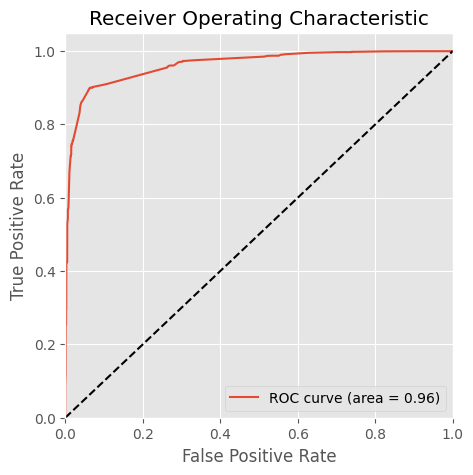

In [ ]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

# **Step 12: Finding optimal value of the cut off**

In [ ]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.220063,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.220063,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.001214,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.874410,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.999281,7987,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.800819,0.973017,0.692958,0.664990
0.2,0.2,0.820973,0.956255,0.736236,0.694271
0.3,0.3,0.918281,0.902289,0.928297,0.887415
0.4,0.4,0.918910,0.900654,0.930346,0.890101
0.5,0.5,0.921902,0.897383,0.937260,0.899590
0.6,0.6,0.912297,0.830744,0.963380,0.934253
0.7,0.7,0.893560,0.755928,0.979770,0.959025
0.8,0.8,0.893560,0.753884,0.981050,0.961418
0.9,0.9,0.828846,0.566231,0.993342,0.981573


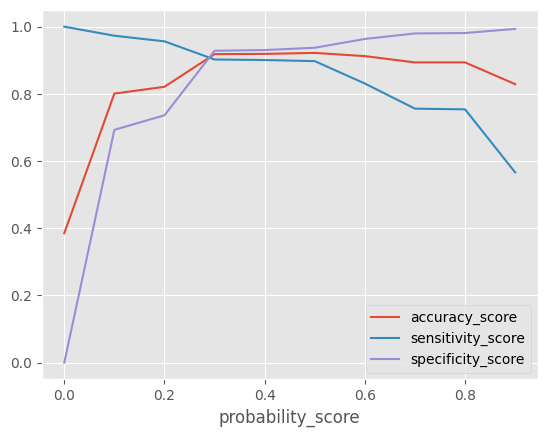

In [ ]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

# **Precision-Recall Trade off**

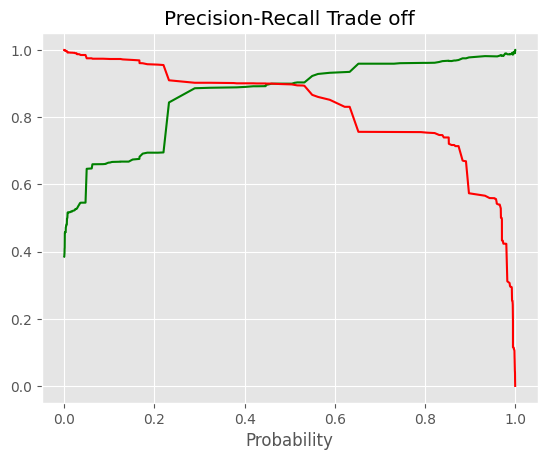

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

# **Comment:**

In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal. In Precision-Recall Curve 0.3 looks optimal.

We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [ ]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.220063,3009,0,22
1,0,0.220063,1012,0,22
2,0,0.001214,9226,0,0
3,1,0.874410,4750,1,87
4,1,0.999281,7987,1,100


In [ ]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3621  284]
 [ 239 2207]]
Accuracy : 0.9176507636592662
Sensitivity : 0.9022894521668029
Specificity : 0.9272727272727272
Precision : 0.885989562424729


(0.9176507636592662,
 np.float64(0.9022894521668029),
 np.float64(0.9272727272727272),
 0.885989562424729)

In [ ]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,1.000000,1,100
1,1,1490,1.000000,1,100
2,0,7936,1.000000,1,100
3,1,4216,0.998397,1,100
4,0,3830,1.000000,1,100


In [ ]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[ 393 1341]
 [  34  955]]
Accuracy : 0.4950422328314359
Sensitivity : 0.9656218402426694
Specificity : 0.22664359861591696
Precision : 0.41594076655052264


(0.4950422328314359,
 np.float64(0.9656218402426694),
 np.float64(0.22664359861591696),
 0.41594076655052264)

# **Step 12 : Final Model**

In [ ]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):

    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())

    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())

    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)

    return y_test_pred_final

In [ ]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.220063                  0          22
1         1012          0             0.220063                  0          22
2         9226          0             0.001214                  0           0
3         4750          1             0.874410                  1          87
4         7987          1             0.999281                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             1.000000                  1         100
1         1490          1             1.000000                  1         100
2         7936          0             1.000000                  1         100
3         4216          1             0.998397                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.998397,1,100
4,3830,0,1.000000,1,100
...,...,...,...,...,...
2718,850,0,1.000000,1,100
2719,2879,0,1.000000,1,100
2720,6501,1,1.000000,1,100
2721,7155,0,1.000000,1,100


In [ ]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                           -1.791204
Total Time Spent on Website                      1.395719
Lead Origin_Lead Add Form                        1.311767
Lead Source_Welingak Website                     3.066837
Last Activity_SMS Sent                           1.810108
Tags_Busy                                        3.598185
Tags_Closed by Horizzon                          8.653719
Tags_Lost to EINS                      

# **Conclusion:**

The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

Optimum cut off is chosen to be 0.27 i.e. any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)

Our final Logistic Regression Model is built with 14 features.

Features used in final model are ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']

The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Lead Quality_Worst’ with respect to the absolute value of their coefficient factors.

‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’ are obtained by encoding original categorical variable ‘Tags’. ‘Lead Quality_Worst’ is obtained by encoding the categorical variable ‘Lead Quality’.

Tags_Lost to EINS (Coefficient factor = 9.532070)

Tags_Closed by Horizzon (Coefficient factor = 8.653719)

Lead Quality_Worst (Coefficient factor =-3.949331)

The final model has Sensitivity of 0.9656, this means the model is able to predict 96.56% customers out of all the converted customers, (Positive conversion) correctly.

The final model has Precision of  0.4159, this means  41.59% of predicted hot leads are True Hot Leads.

We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)

# **Subjective Question**
X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

In [ ]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.1)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.220063                  1          22
1         1012          0             0.220063                  1          22
2         9226          0             0.001214                  0           0
3         4750          1             0.874410                  1          87
4         7987          1             0.999281                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             1.000000                  1         100
1         1490          1             1.000000                  1         100
2         7936          0             1.000000                  1         100
3         4216          1             0.998397                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.998397,1,100
4,3830,0,1.000000,1,100
...,...,...,...,...,...
2718,850,0,1.000000,1,100
2719,2879,0,1.000000,1,100
2720,6501,1,1.000000,1,100
2721,7155,0,1.000000,1,100


# **Subjective Question**
Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [ ]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.220063                  0          22
1         1012          0             0.220063                  0          22
2         9226          0             0.001214                  0           0
3         4750          1             0.874410                  0          87
4         7987          1             0.999281                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             1.000000                  1         100
1         1490          1             1.000000                  1         100
2         7936          0             1.000000                  1         100
3         4216          1             0.998397                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.998397,1,100
4,3830,0,1.000000,1,100
...,...,...,...,...,...
2718,850,0,1.000000,1,100
2719,2879,0,1.000000,1,100
2720,6501,1,1.000000,1,100
2721,7155,0,1.000000,1,100
